# Brain Tumor Detection

In [8]:
!pip install opendatasets

  Obtaining dependency information for opendatasets from https://files.pythonhosted.org/packages/00/e7/12300c2f886b846375c78a4f32c0ae1cd20bdcf305b5ac45b8d7eceda3ec/opendatasets-0.1.22-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 512.7 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111945 sha256=3165ec91545064b5f6c17357fb323c5450b694f60833efef4ed848363099e099
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/97/06/54/3d44857e6aa73d66d0174f29389e7ea70c007105797e6ec05c
Successfully built kaggle


In [9]:
! pip install pydot

In [10]:
!pip install graphviz

In [11]:
import opendatasets as od
od.download("https://www.kaggle.com/mateuszbuda/lgg-mri-segmentation")

Skipping, found downloaded files in "./lgg-mri-segmentation" (use force=True to force download)


In [12]:
# downloading helper_functions.py
! pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9e5e8c5f08a7112463bef8f389e2aaf8b04b650c9aa835e76ea0d5facb53bac0
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [13]:
import wget
!python -m wget https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py

100% [..........................................................] 10139 / 10139
Saved under helper_functions (1).py


In [16]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/Users/mac/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/mac/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/mac/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requireme

## Importing dependancies

In [1]:
# Importing dependancies
import os
import cv2
import random
import numpy as np
import pandas as pd
from skimage import io
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves

In [2]:
# lookthroug our data
walk_through_dir(".\lgg-mri-segmentation\kaggle_3m")

There are 110 directories and 2 images in '.\lgg-mri-segmentation\kaggle_3m'.
There are 0 directories and 46 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_CS_4941_19960909'.
There are 0 directories and 40 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_CS_4942_19970222'.
There are 0 directories and 40 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_CS_4943_20000902'.
There are 0 directories and 40 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_CS_4944_20010208'.
There are 0 directories and 40 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_CS_5393_19990606'.
There are 0 directories and 40 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_CS_5395_19981004'.
There are 0 directories and 48 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_CS_5396_20010302'.
There are 0 directories and 44 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_CS_5397_20010315'.
There are 0 directories and 50 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_CS_6186_20000601'.
There are 0 directories and 48 

There are 0 directories and 42 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7680_19970202'.
There are 0 directories and 50 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7684_19950816'.
There are 0 directories and 40 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7686_19950629'.
There are 0 directories and 48 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7690_19960312'.
There are 0 directories and 40 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7692_19960724'.
There are 0 directories and 42 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7693_19950520'.
There are 0 directories and 42 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7694_19950404'.
There are 0 directories and 42 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7855_19951020'.
There are 0 directories and 64 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7856_19950831'.
There are 0 directories and 44 images in '.\lgg-mri-segmentation\kaggle_3m\TCGA_HT_7860_19960513'.
There are 

In [3]:
# getting the directories
dir = []
for dir_ in os.listdir("./lgg-mri-segmentation/kaggle_3m/"):
  if dir_.split("_")[0] == "TCGA":
    dir.append("./lgg-mri-segmentation/kaggle_3m/" + dir_)
len(dir)

110

In [4]:
dir[:5]

['./lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4942_19970222',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4943_20000902',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4944_20010208',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_5393_19990606']

In [5]:
# Getting the filepaths of all images
file_paths = []
for dir_ in dir:
  for file_path in os.listdir(dir_):
    if len(file_path.split("_")) == 5:
      file_paths.append(dir_ + "/" + file_path)
len(file_paths)

3929

In [6]:
file_paths[:5]

['./lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10.tif',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11.tif',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12.tif',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13.tif']

In [7]:
# Getting file paths of masked images
file_paths_masked = []
for elem in file_paths:
  file_paths_masked.append("." + elem.split(".")[1] + "_mask.tif")
len(file_paths_masked)

3929

In [8]:
file_paths_masked[:5]

['./lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_mask.tif',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10_mask.tif',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_12_mask.tif',
 './lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13_mask.tif']

In [9]:
file_paths[0].split("/")[3]

'TCGA_CS_4941_19960909'

In [10]:
# Plotting original image with its mask
def plot_orig_mask():
  plt.figure(figsize=(10, 7))
  # Getting the image
  rand_ = np.random.randint(len(file_paths))
  img = plt.imread(file_paths[rand_])
  img_mask = plt.imread(file_paths_masked[rand_])

  # Plotting the image
  plt.subplot(1, 2, 1)
  plt.imshow(img/255)
  plt.title("Original", color="green")
  plt.axis(False)
  
  plt.subplot(1, 2, 2)
  plt.imshow(img_mask/255)
  plt.title("Masked", color="blue")
  plt.axis(False);

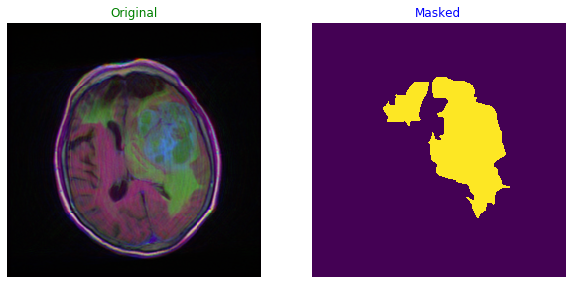

In [11]:
# Plotting the image
plot_orig_mask()

In [12]:
# Creating train, val and test splits
df = pd.DataFrame({"filename":file_paths,
                   "mask":file_paths_masked})

df_train, df_test = train_test_split(df,test_size=0.1)
df_train, df_val = train_test_split(df_train,test_size=0.2)

df_train.shape, df_val.shape, df_test.shape

((2828, 2), (708, 2), (393, 2))

In [13]:
def train_generator(data_frame, batch_size, aug_dict, image_color_mode="rgb", 
                    mask_color_mode="grayscale", image_save_prefix="image", mask_save_prefix="mask", 
                    save_to_dir=None, target_size=(256,256), seed=1):
    
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    
    image_generator = image_datagen.flow_from_dataframe(
        data_frame,
        x_col = "filename",
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)

    mask_generator = mask_datagen.flow_from_dataframe(
        data_frame,
        x_col = "mask",
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    
    train_gen = zip(image_generator,mask_generator)
    
    for (img, mask) in train_gen:
      img , mask = adjust_data(img,mask)
      yield (img,mask)
        
def adjust_data(img,mask):
  img=img/255
  mask=mask/255
  mask[mask>0.5]=1
  mask[mask<=0.5]=0
        
  return (img,mask)

In [14]:
def dice_coef(y_true,y_pred):
    y_truef = K.flatten(y_true)
    y_predf = K.flatten(y_pred)
    cal=K.sum(y_truef*y_predf)
    
    return ((2*cal+100)/(K.sum(y_truef)+K.sum(y_predf)+100))

def dice_coef_loss(y_true,y_pred):
    return -dice_coef(y_true,y_pred)

def iou(y_true,y_pred):
    intersection = K.sum(y_true*y_pred)
    sum_ = K.sum(y_true+y_pred)
    jac = (intersection+100)/(sum_-intersection+100)
    return jac

def jac_distance(y_true,y_pred):
    y_truef = K.flatten(y_true)
    y_predf = K.flatten(y_pred)
    
    return -iou(y_true,y_pred)

In [15]:
def unet(input_size=(256,256,3)):
    inputs = layers.Input(input_size)
    
    conv1 = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    bn1 = layers.Activation('relu')(conv1)
    conv1 = layers.Conv2D(64, (3, 3), padding='same')(bn1)
    bn1 = layers.BatchNormalization(axis=3)(conv1)
    bn1 = layers.Activation('relu')(bn1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(bn1)

    conv2 = layers.Conv2D(128, (3, 3), padding='same')(pool1)
    bn2 = layers.Activation('relu')(conv2)
    conv2 = layers.Conv2D(128, (3, 3), padding='same')(bn2)
    bn2 = layers.BatchNormalization(axis=3)(conv2)
    bn2 = layers.Activation('relu')(bn2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(bn2)

    conv3 = layers.Conv2D(256, (3, 3), padding='same')(pool2)
    bn3 = layers.Activation('relu')(conv3)
    conv3 = layers.Conv2D(256, (3, 3), padding='same')(bn3)
    bn3 = layers.BatchNormalization(axis=3)(conv3)
    bn3 = layers.Activation('relu')(bn3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(bn3)

    conv4 = layers.Conv2D(512, (3, 3), padding='same')(pool3)
    bn4 = layers.Activation('relu')(conv4)
    conv4 = layers.Conv2D(512, (3, 3), padding='same')(bn4)
    bn4 = layers.BatchNormalization(axis=3)(conv4)
    bn4 = layers.Activation('relu')(bn4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(bn4)

    conv5 = layers.Conv2D(1024, (3, 3), padding='same')(pool4)
    bn5 = layers.Activation('relu')(conv5)
    conv5 = layers.Conv2D(1024, (3, 3), padding='same')(bn5)
    bn5 = layers.BatchNormalization(axis=3)(conv5)
    bn5 = layers.Activation('relu')(bn5)

    up6 = layers.concatenate([layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(bn5), conv4], axis=3)
    conv6 = layers.Conv2D(512, (3, 3), padding='same')(up6)
    bn6 = layers.Activation('relu')(conv6)
    conv6 = layers.Conv2D(512, (3, 3), padding='same')(bn6)
    bn6 = layers.BatchNormalization(axis=3)(conv6)
    bn6 = layers.Activation('relu')(bn6)

    up7 = layers.concatenate([layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(bn6), conv3], axis=3)
    conv7 = layers.Conv2D(256, (3, 3), padding='same')(up7)
    bn7 = layers.Activation('relu')(conv7)
    conv7 = layers.Conv2D(256, (3, 3), padding='same')(bn7)
    bn7 = layers.BatchNormalization(axis=3)(conv7)
    bn7 = layers.Activation('relu')(bn7)

    up8 = layers.concatenate([layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(bn7), conv2], axis=3)
    conv8 = layers.Conv2D(128, (3, 3), padding='same')(up8)
    bn8 = layers.Activation('relu')(conv8)
    conv8 = layers.Conv2D(128, (3, 3), padding='same')(bn8)
    bn8 = layers.BatchNormalization(axis=3)(conv8)
    bn8 = layers.Activation('relu')(bn8)

    up9 = layers.concatenate([layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(bn8), conv1], axis=3)
    conv9 = layers.Conv2D(64, (3, 3), padding='same')(up9)
    bn9 = layers.Activation('relu')(conv9)
    conv9 = layers.Conv2D(64, (3, 3), padding='same')(bn9)
    bn9 = layers.BatchNormalization(axis=3)(conv9)
    bn9 = layers.Activation('relu')(bn9)

    conv10 = layers.Conv2D(1, (1, 1), activation='sigmoid')(bn9)

    return models.Model(inputs=[inputs], outputs=[conv10])

In [16]:
model = unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 256, 256, 64  0           ['conv2d[0][0]']                 
                                )                                                             

### The model was trained on Cloud GPU

In [32]:
EPOCHS = 150
BATCH_SIZE = 2
learning_rate = 1e-4
BATCH_SIZE = 2
decay_rate = learning_rate / EPOCHS
opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay_rate, amsgrad=False)

In [ ]:
train_generator_args = dict(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = train_generator(df_train, BATCH_SIZE,
                            train_generator_args,
                            target_size=(256, 256))
    
test_gener = train_generator(df_val, BATCH_SIZE,
                             dict(),
                             target_size=(256, 256))
    
model = unet(input_size=(256, 256, 3))

model.compile(optimizer=opt, 
              loss=dice_coef_loss, 
              metrics=["binary_accuracy", iou, dice_coef])

callbacks = [ModelCheckpoint('./Brain_MRI_Model', verbose=1, save_best_only=True)]

history = model.fit(train_gen,
                    steps_per_epoch=len(df_train) / BATCH_SIZE, 
                    epochs=EPOCHS, 
                    callbacks=callbacks,
                    validation_data = test_gener,
                    validation_steps=len(df_val) / BATCH_SIZE)

## Predictions with model

In [17]:
# Loading the trained and downloaded model from the cloud
load_model = tf.keras.models.load_model("unet_brain_mri_seg.hdf5", custom_objects={'dice_coef_loss': dice_coef_loss, 
                                                                                   'iou': iou, 
                                                                                   'dice_coef': dice_coef})
load_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 256, 256, 64  1792        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 activation_18 (Activation)     (None, 256, 256, 64  0           ['conv2d_19[0][0]']              
                                )                                                           

In [34]:
# Generating test paths
test_filepaths = list(df_test["filename"])
test_mask_filepaths = list(df_test["mask"])
len(test_filepaths), len(test_mask_filepaths)

(393, 393)

In [ ]:
plt.axis(False);

img = io.imread(file_paths[444])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = io.imread(file_paths_masked[444])

img[mask == 255] = (255, 0, 0)
plt.imshow(img)
plt.axis(False);

In [140]:
# To plot our predictions
def plot_random_preds():
    plt.figure(figsize=(17, 10))
    rand_arr = random.sample(range(len(test_filepaths)), 3)
    i_ = 0
    for i in range(0, 11, 5):
        # getting the images
        img = io.imread(test_filepaths[rand_arr[i_]])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        true_mask = io.imread(test_mask_filepaths[rand_arr[i_]])
        
        # making predictions
        pred_mask = load_model.predict(tf.expand_dims(img, axis=0)/255)
        pred_mask = pred_mask[np.newaxis, :, :, :]
        pred_mask = np.squeeze(pred_mask) > .5

        # Plotting the images
        plt.subplot(3, 5, i+1)
        plt.axis(False)
        plt.title("Image", color="blue")
        plt.imshow(img)
        
        # To plot original image
        plt.subplot(3, 5, i+2)
        plt.axis(False)
        plt.title("True Mask", color="green")
        plt.imshow(true_mask)
        
        # To plot pred 
        plt.subplot(3, 5, i+3)
        plt.axis(False)
        plt.title("Pred Mask", color="red")
        plt.imshow(pred_mask)
        
        # To plot orig mask on image
        img[true_mask == 255] = (0, 255, 0)
        plt.subplot(3, 5, i+4)
        plt.axis(False)
        plt.title("True Mask", color="green")
        plt.imshow(img)
        
        # To plot pred mask on image 
        img_ = io.imread(test_filepaths[rand_arr[i_]])
        img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
        img_[pred_mask == 1] = (255, 0, 0)
        plt.subplot(3, 5, i+5)
        plt.axis(False)
        plt.title("Pred Mask", color="red")
        i_ += 1
        plt.imshow(img_);

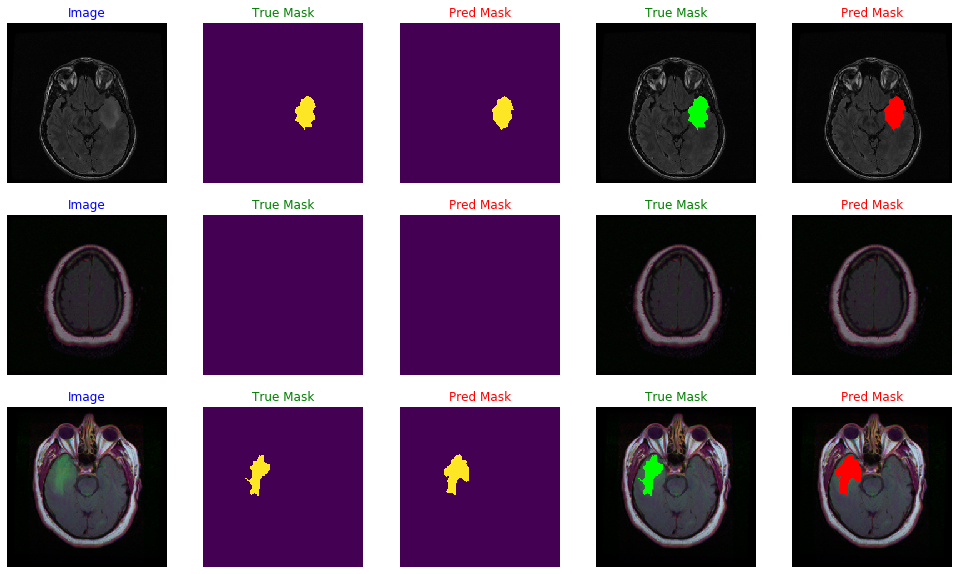

In [141]:
# Plotting random preds from test
plot_random_preds()

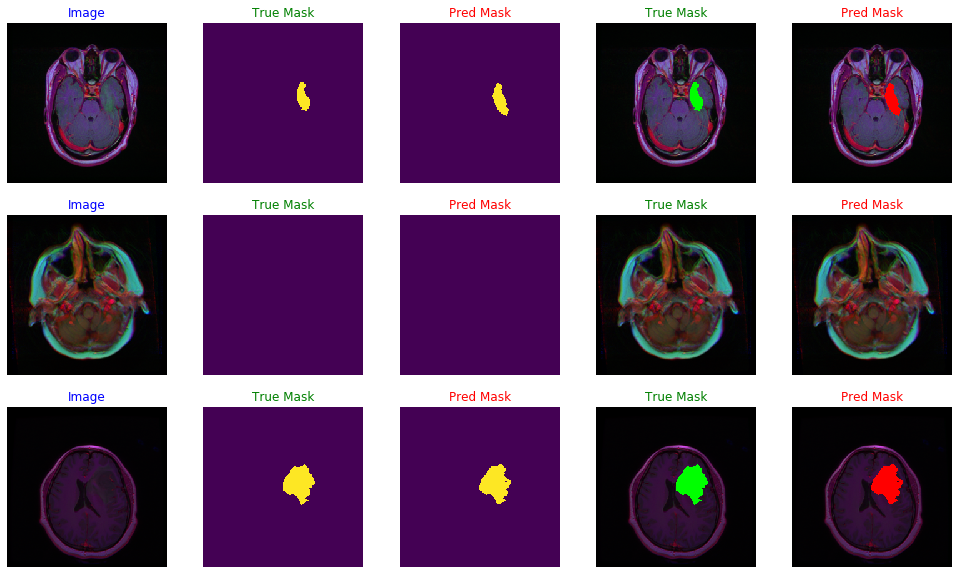

In [142]:
# Plotting random preds from test
plot_random_preds()

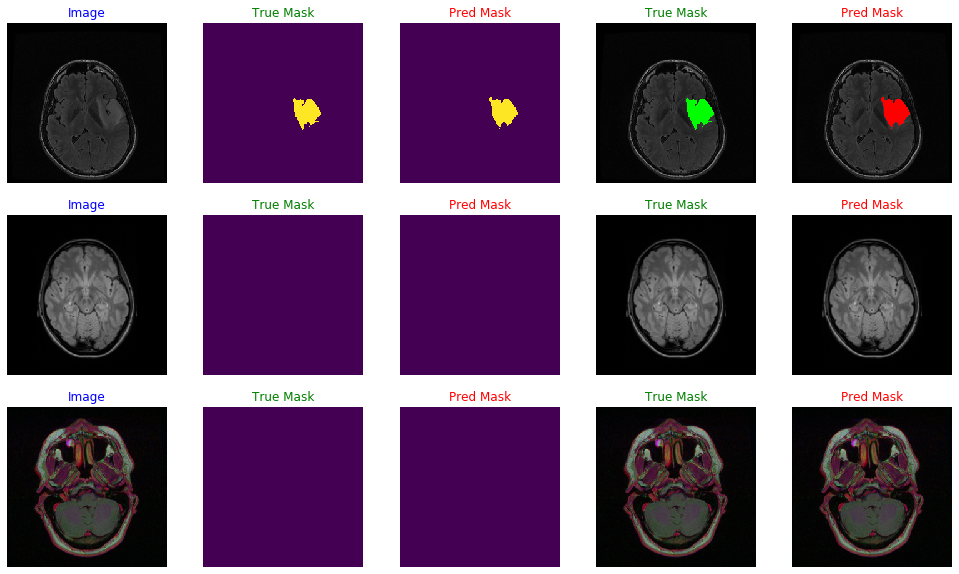

In [145]:
# Plotting random preds from test
plot_random_preds()

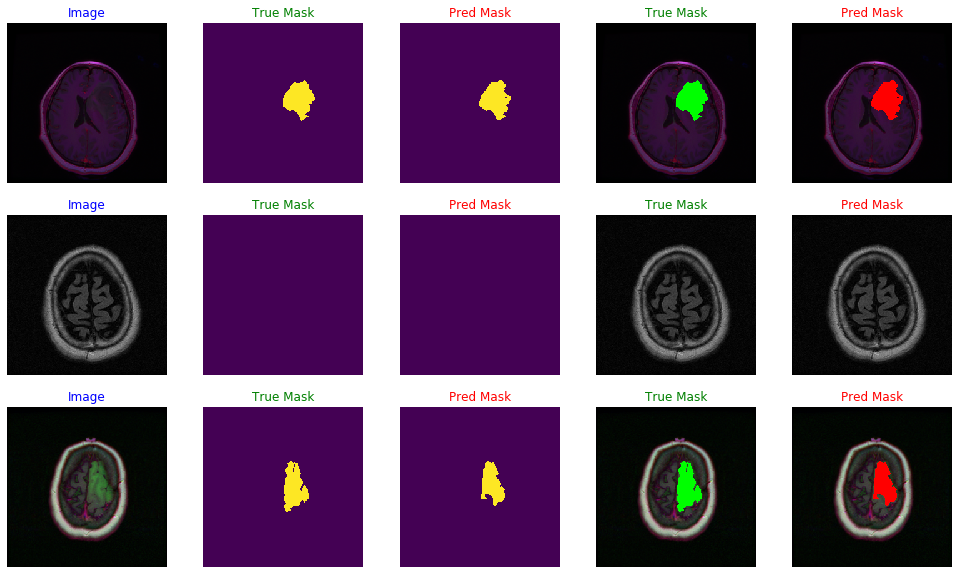

In [144]:
# Plotting random preds from test
plot_random_preds()

In [148]:
img = io.imread("TCGA_CS_4944_20010208_11.tif")
img.shape

(256, 256, 3)